<a href="https://colab.research.google.com/github/codewithdark-git/Transformers/blob/main/self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## self Attention with torch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads=1, dropout=0.1):
        """
        Initializes the SelfAttention module.

        Args:
            input_dim (int): The dimension of the input features.
            embed_dim (int): The dimensionality of the task-specific embeddings.
            num_heads (int): Number of attention heads (default: 1).
            dropout (float): Dropout rate for the attention scores (default: 0.1).
        """
        super(SelfAttention, self).__init__()
        assert embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear layers for Q, K, V
        self.q_proj = nn.Linear(input_dim, embed_dim)
        self.k_proj = nn.Linear(input_dim, embed_dim)
        self.v_proj = nn.Linear(input_dim, embed_dim)

        # Output projection
        self.out_proj = nn.Linear(embed_dim, embed_dim)

        # Dropout for attention scores
        self.attn_dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        Forward pass for self-attention.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, seq_len, input_dim).

        Returns:
            torch.Tensor: Task-specific embeddings of shape (batch_size, seq_len, embed_dim).
        """
        batch_size, seq_len, _ = x.size()

        # Compute Q, K, V
        Q = self.q_proj(x)  # (batch_size, seq_len, embed_dim)
        K = self.k_proj(x)  # (batch_size, seq_len, embed_dim)
        V = self.v_proj(x)  # (batch_size, seq_len, embed_dim)

        # Split into multiple heads
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)

        # Scaled dot-product attention
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)  # (batch_size, num_heads, seq_len, seq_len)
        attn_weights = F.softmax(attn_scores, dim=-1)  # (batch_size, num_heads, seq_len, seq_len)
        attn_weights = self.attn_dropout(attn_weights)

        # Compute attention output
        attn_output = torch.matmul(attn_weights, V)  # (batch_size, num_heads, seq_len, head_dim)

        # Concatenate heads
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.embed_dim)  # (batch_size, seq_len, embed_dim)

        # Final linear projection
        output = self.out_proj(attn_output)  # (batch_size, seq_len, embed_dim)

        return output


In [2]:
# Example usage
batch_size = 32
seq_len = 10
input_dim = 128
embed_dim = 256
num_heads = 4

x = torch.rand(batch_size, seq_len, input_dim)
self_attention = SelfAttention(input_dim, embed_dim, num_heads)
output = self_attention(x)

print("Output shape:", output.shape)  # Expected: (batch_size, seq_len, embed_dim)


Output shape: torch.Size([32, 10, 256])


In [3]:
output

tensor([[[-0.1414,  0.0085,  0.0946,  ..., -0.1349,  0.0411, -0.0698],
         [-0.1062,  0.0580,  0.1125,  ..., -0.1365,  0.0186, -0.0713],
         [-0.1572,  0.0286,  0.1197,  ..., -0.1359,  0.0376, -0.0728],
         ...,
         [-0.1232,  0.0182,  0.1186,  ..., -0.1427,  0.0293, -0.0536],
         [-0.1352,  0.0290,  0.1230,  ..., -0.1470,  0.0466, -0.0687],
         [-0.0948,  0.0401,  0.0984,  ..., -0.1314, -0.0085, -0.0423]],

        [[-0.0425,  0.0093,  0.1264,  ..., -0.1640,  0.0506,  0.0381],
         [ 0.0116,  0.0213,  0.0996,  ..., -0.1147, -0.0503, -0.0157],
         [-0.0366,  0.0010,  0.1114,  ..., -0.1386,  0.0870,  0.0127],
         ...,
         [-0.0215, -0.0090,  0.1040,  ..., -0.1353,  0.0245,  0.0592],
         [-0.0348,  0.0072,  0.1251,  ..., -0.1642,  0.0281,  0.0366],
         [-0.0411, -0.0144,  0.0823,  ..., -0.1411,  0.0551,  0.0414]],

        [[-0.0369, -0.0355,  0.1397,  ..., -0.1014,  0.0452, -0.0586],
         [-0.0532,  0.0040,  0.1415,  ..., -0

## Self Attention in only Numpy

In [7]:
import numpy as np

class SelfAttention:
    def __init__(self, embed_dim, num_heads=1):
        """
        Initializes the SelfAttention module.

        Args:
            embed_dim (int): Dimensionality of the input/output embeddings.
            num_heads (int): Number of attention heads.
        """
        assert embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Initialize weight matrices for Q, K, V, and output projection
        self.q_proj = np.random.randn(embed_dim, embed_dim).astype(np.float32)
        self.k_proj = np.random.randn(embed_dim, embed_dim).astype(np.float32)
        self.v_proj = np.random.randn(embed_dim, embed_dim).astype(np.float32)
        self.out_proj = np.random.randn(embed_dim, embed_dim).astype(np.float32)

    def softmax(self, x, axis=-1):
        """Compute softmax along the specified axis."""
        exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

    def forward(self, embeddings):
        """
        Forward pass for self-attention.

        Args:
            embeddings (np.ndarray): Input tensor of shape (batch_size, seq_len, embed_dim).

        Returns:
            np.ndarray: Contextual embeddings of shape (batch_size, seq_len, embed_dim).
        """
        batch_size, seq_len, _ = embeddings.shape

        # Compute Q, K, V
        Q = np.dot(embeddings, self.q_proj)  # (batch_size, seq_len, embed_dim)
        K = np.dot(embeddings, self.k_proj)  # (batch_size, seq_len, embed_dim)
        V = np.dot(embeddings, self.v_proj)  # (batch_size, seq_len, embed_dim)

        # Split into multiple heads
        Q = Q.reshape(batch_size, seq_len, self.num_heads, self.head_dim).transpose(0, 2, 1, 3)
        K = K.reshape(batch_size, seq_len, self.num_heads, self.head_dim).transpose(0, 2, 1, 3)
        V = V.reshape(batch_size, seq_len, self.num_heads, self.head_dim).transpose(0, 2, 1, 3)

        # Scaled dot-product attention
        scores = np.matmul(Q, K.transpose(0, 1, 3, 2)) / np.sqrt(self.head_dim)  # (batch_size, num_heads, seq_len, seq_len)
        attn_weights = self.softmax(scores, axis=-1)  # (batch_size, num_heads, seq_len, seq_len)

        # Compute attention output
        attn_output = np.matmul(attn_weights, V)  # (batch_size, num_heads, seq_len, head_dim)

        # Concatenate heads
        attn_output = attn_output.transpose(0, 2, 1, 3).reshape(batch_size, seq_len, self.embed_dim)

        # Final linear projection
        output = np.dot(attn_output, self.out_proj)  # (batch_size, seq_len, embed_dim)

        return output

In [16]:
# Step 1: Simple Text Tokenizer and Word Embeddings
def text_to_word_embeddings(text, vocab, embedding_dim=128):
    """
    Converts text to word embeddings.

    Args:
        text (str): Input text.
        vocab (dict): Vocabulary mapping words to indices.
        embedding_dim (int): Dimensionality of the word embeddings.

    Returns:
        np.ndarray: Word embeddings of shape (1, seq_len, embedding_dim).
    """
    tokens = text.lower().split()
    seq_len = len(tokens)
    embedding_matrix = np.random.randn(len(vocab), embedding_dim).astype(np.float32)  # Random embeddings
    token_indices = [vocab[token] for token in tokens if token in vocab]
    word_embeddings = embedding_matrix[token_indices]  # Shape: (seq_len, embedding_dim)
    return word_embeddings[np.newaxis, :, :]  # Add batch dimension: (1, seq_len, embedding_dim)

# Step 2: Define Vocabulary and Test Data
vocab = {"the": 0, "cat": 1, "sat": 2, "on": 3, "mat": 4}
text = "The cat sat on the mat"
tokens = text.lower().split()

# Step 3: Convert Text to Word Embeddings
word_embeddings = text_to_word_embeddings(text, vocab)



In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings(original, contextual, tokens):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    original_2d = pca.fit_transform(original)
    contextual_2d = pca.transform(contextual)

    plt.figure(figsize=(10, 7))

    # Plot original embeddings
    for i, token in enumerate(tokens):
        plt.scatter(original_2d[i, 0], original_2d[i, 1], color='blue', label='Original' if i == 0 else "", alpha=0.7)
        plt.text(original_2d[i, 0], original_2d[i, 1], f"{token} (O)", fontsize=10, color='blue')

    # Plot contextual embeddings
    for i, token in enumerate(tokens):
        plt.scatter(contextual_2d[i, 0], contextual_2d[i, 1], color='red', label='Contextualized' if i == 0 else "", alpha=0.7)
        plt.text(contextual_2d[i, 0], contextual_2d[i, 1], f"{token} (C)", fontsize=10, color='red')

        # Draw arrow
        plt.arrow(
            original_2d[i, 0], original_2d[i, 1],
            contextual_2d[i, 0] - original_2d[i, 0], contextual_2d[i, 1] - original_2d[i, 1],
            head_width=0.1, head_length=0.15, fc='gray', ec='gray', alpha=0.6
        )

    plt.title("Word Embeddings vs. Contextualized Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# Step 4: Initialize Self-Attention and Compute Contextual Embeddings
embed_dim = 128
num_heads = 4
self_attention = SelfAttention(embed_dim, num_heads)
contextual_embeddings = self_attention.forward(word_embeddings)

In [19]:
# Step 5: Compare Word Embeddings with Contextual Embeddings
print("Original Word Embeddings:")
print(word_embeddings[0])  # Removing batch dimension for readability


Original Word Embeddings:
[[-1.4436779  -1.0878867  -0.28214258 -2.1454153  -0.65947247 -0.15183443
   0.97955084 -0.5967889   0.42792127  0.38141954 -1.067651   -0.11746289
   0.11230595  1.2617997  -0.6830716   0.2834391   0.03536297  0.8475389
   0.98462677 -0.4684809  -0.59995204  0.13478152  0.7454664   1.7913399
   0.821727   -0.025318    1.0801439  -0.96725655 -0.26100138 -0.50384676
   0.1290478   0.5366775  -1.1231132   1.1585884   1.3989898   2.2759674
   1.025622    1.3253195  -1.123167    0.86199903  0.827386    0.822978
   0.2720641   0.93785197 -0.7887541   0.7848053  -1.2584026   0.1324626
  -0.9681067  -1.0959352   0.38287356 -0.1353914  -0.3364491  -1.1882979
  -0.06976965  1.8656459   1.7177984  -0.3392874  -0.59745365  0.28165144
  -0.1081459  -0.80725133 -0.14968035  0.7124244   0.6362438   1.2384149
  -0.7607656  -0.2880544   1.0745682   0.17111775  0.07327978  0.36915496
  -0.07788777 -0.02335405 -2.435548    0.68750197  0.40883496  2.068563
  -0.13321236  0.09308

In [20]:
print("\nContextualized Embeddings (via Self-Attention):")
print(contextual_embeddings[0])  # Removing batch dimension for readability


Contextualized Embeddings (via Self-Attention):
[[-1.41186188e+02  1.22214079e+01  3.77975281e+02  2.32139969e+02
   1.71615967e+02  8.25330200e+01 -5.19644470e+01  1.59938110e+02
   3.63780746e+01 -1.71735291e+02 -1.37178345e+02  2.36216049e+02
   1.24193237e+02 -1.99522812e+02  1.61677200e+02  7.93882141e+01
  -7.52479248e+01  9.84638824e+01 -6.48828125e+01 -1.42056458e+02
  -4.19698639e+01 -1.01570366e+02  9.36608047e+01 -1.32970600e+01
   1.68804886e+02 -1.68000317e+01 -1.56997566e+01  1.00797752e+02
  -2.70883484e+02 -1.70778107e+02  1.60148468e+02  1.36156523e+00
  -1.72361488e+01 -4.34247131e+01  1.30154099e+02 -1.46370895e+02
  -6.03380699e+01  6.39330978e+01  3.37397537e+01  1.03617191e+01
  -2.36614502e+02 -9.82100964e+00  2.03239761e+02 -3.72094727e+01
   1.86012085e+02  2.52722290e+02 -2.87723713e+01  8.45634155e+01
   8.97883129e+00 -8.11836014e+01  2.21767212e+02  5.38861885e+01
   3.71655998e+01 -1.48988312e+02  2.60151978e+02 -1.25917177e+01
   1.33891449e+02 -2.533025

In [21]:
# Step 6: Show the Difference
difference = contextual_embeddings - word_embeddings
print("\nDifference between Contextualized and Word Embeddings:")
print(difference[0])  # Removing batch dimension for readability


Difference between Contextualized and Word Embeddings:
[[-1.39742508e+02  1.33092947e+01  3.78257416e+02  2.34285385e+02
   1.72275436e+02  8.26848526e+01 -5.29439964e+01  1.60534897e+02
   3.59501534e+01 -1.72116714e+02 -1.36110687e+02  2.36333511e+02
   1.24080933e+02 -2.00784607e+02  1.62360275e+02  7.91047745e+01
  -7.52832870e+01  9.76163406e+01 -6.58674393e+01 -1.41587982e+02
  -4.13699112e+01 -1.01705147e+02  9.29153366e+01 -1.50883999e+01
   1.67983154e+02 -1.67747135e+01 -1.67798996e+01  1.01765007e+02
  -2.70622498e+02 -1.70274261e+02  1.60019424e+02  8.24887753e-01
  -1.61130352e+01 -4.45833015e+01  1.28755112e+02 -1.48646866e+02
  -6.13636932e+01  6.26077766e+01  3.48629227e+01  9.49971962e+00
  -2.37441895e+02 -1.06439877e+01  2.02967697e+02 -3.81473236e+01
   1.86800842e+02  2.51937485e+02 -2.75139694e+01  8.44309540e+01
   9.94693756e+00 -8.00876694e+01  2.21384338e+02  5.40215797e+01
   3.75020485e+01 -1.47800018e+02  2.60221741e+02 -1.44573631e+01
   1.32173645e+02 -2

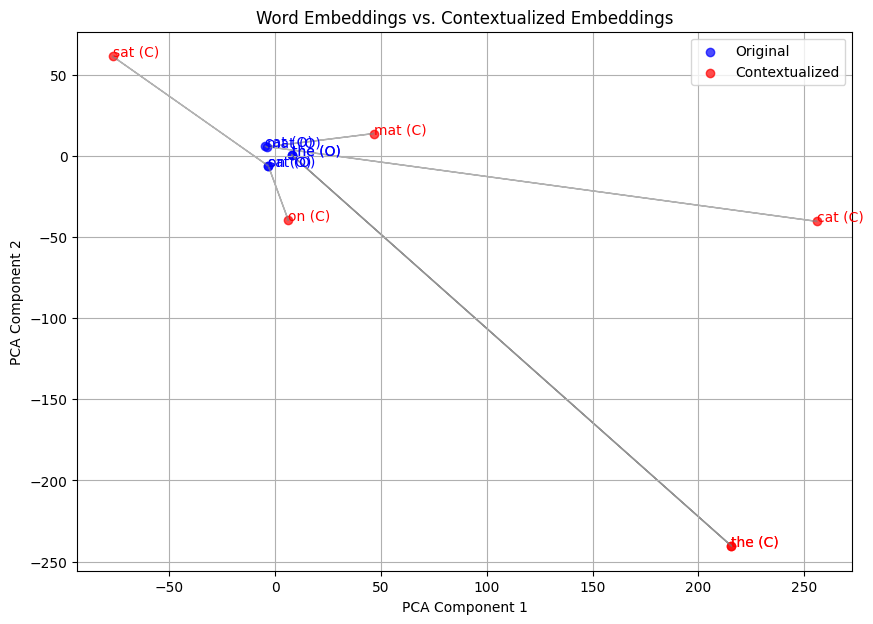

In [22]:
plot_embeddings(word_embeddings[0], contextual_embeddings[0], tokens)